In [5]:
#import dependencies
import pandas as pd
import sklearn as skl
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import joblib

In [2]:
# train = pd.read_csv('Resources/Cleaned/train.csv')
# test = pd.read_csv('Resources/Cleaned/test.csv')
# concat = pd.concat([train, test])
# concat

In [3]:
import main_preprocessing

concat = main_preprocessing.X_scaled
concat

array([[ 1.61946181,  3.07670468,  0.492293  , ..., -0.21619812,
        -0.77451888,  3.25494177],
       [ 1.87398231,  3.385311  ,  0.60189981, ..., -0.21619812,
         1.29112412, -0.30722516],
       [ 1.39343241,  3.328931  ,  0.55706066, ..., -0.21619812,
        -0.77451888,  3.25494177],
       ...,
       [-1.03780819, -0.80758069, -0.57587517, ..., -0.21619812,
         1.29112412, -0.30722516],
       [-1.04350641, -0.89660175, -0.66854275, ..., -0.21619812,
         1.29112412, -0.30722516],
       [-1.05680226, -0.98859017, -0.66754632, ..., -0.21619812,
         1.29112412, -0.30722516]])

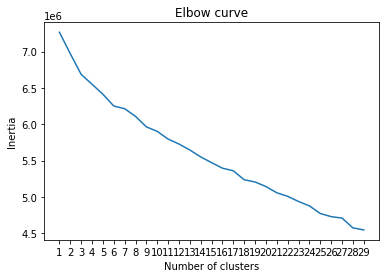

In [4]:
def kmeans(concat):
    inertia = []
    k = list(range(1, 30))

    # Calculate the inertia for the range of k values
    for i in k:
        km = KMeans(n_clusters=i, random_state=0)
        km.fit(concat)
        inertia.append(km.inertia_)

    # Create the Elbow Curve and plot it
    elbow_data = {"k": k, "inertia": inertia}
    df_elbow = pd.DataFrame(elbow_data)
    df_elbow.head()
    
    plt.plot(df_elbow['k'], df_elbow['inertia'])
    plt.xticks(range(1,30))
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow curve')
    return plt.show()

kmeans_mod = kmeans(concat)



In [7]:
# save the kmeans model
joblib.dump(kmeans_mod, 'kmeans_mod.pk1')

['kmeans_mod.pk1']

In [8]:
# k means clustering may not be the optimal approach for this type of problem because there are too many clusters
# for it to be meaningfully useful (even when cluster numbers greater than 30 were used, no "elbow" point was found)

In [15]:
# let's try pca (since running pca by itself while still capturing most all data is difficult to do starting 
# with the original data, let's run pca on tsne features)
def pca(concat):
    pca = PCA(n_components=0.99, random_state=0)
    shroom_pca = pca.fit_transform(concat)
    print(pca.explained_variance_ratio_)
    return shroom_pca

shroom_pca = pca(concat)
shroom_pca

[0.0509923  0.0419914  0.0329962  0.02642333 0.02481621 0.02313377
 0.02153987 0.02113531 0.02046055 0.01975719 0.01943024 0.01787839
 0.01741119 0.01648057 0.01602832 0.01592115 0.01554968 0.01499277
 0.01480526 0.01427076 0.01404314 0.01372248 0.01367272 0.01312201
 0.01305752 0.01240619 0.012161   0.01190589 0.01167794 0.0113776
 0.01100728 0.01096641 0.01077739 0.01048142 0.01020826 0.01001443
 0.00984652 0.00976204 0.00968811 0.00936354 0.00917591 0.00901378
 0.00888717 0.00857184 0.00844407 0.00828572 0.00802647 0.00794147
 0.00774715 0.00766308 0.00757114 0.00741816 0.00734946 0.00716381
 0.00707223 0.0068947  0.00676623 0.00664351 0.00654528 0.00652072
 0.00635028 0.00619607 0.00607999 0.0060087  0.00596222 0.00580071
 0.00567915 0.00561158 0.00549772 0.00528157 0.00518708 0.00511
 0.00499435 0.00478925 0.00473471 0.00458739 0.0045181  0.00433844
 0.00420884 0.00414362 0.00406537 0.00392125 0.00380957 0.00373913
 0.00361768 0.00359475 0.00346046 0.00336052 0.0032147  0.00306563

array([[-6.42029977,  4.63212013,  2.17498339, ...,  0.47150834,
        -1.34895486, -0.59489712],
       [-6.59069971,  4.60317128,  2.45103441, ...,  0.38562133,
        -1.31529255, -0.81992001],
       [-6.4605229 ,  4.64198342,  2.16504846, ...,  0.46556683,
        -1.37015249, -0.55681335],
       ...,
       [ 4.73567157,  2.6610459 ,  0.59189792, ...,  0.4946085 ,
         0.07387268,  0.0604034 ],
       [ 4.52730939,  2.80157044,  0.10480261, ...,  0.48057043,
         0.03812838,  0.01158178],
       [ 4.78146244,  2.65044813,  0.52525205, ...,  0.50035824,
         0.08807905,  0.04124892]])

(61069, 2)


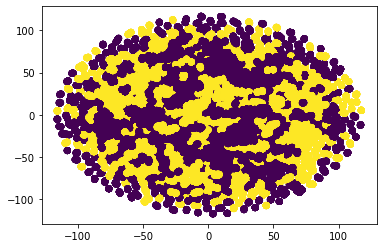

['tsne_mod.pk1']

In [21]:
# perhaps pca or tsne here can be useful in reducing the number of clusters
def tsne(shroom_pca):
    
    tsne = TSNE(learning_rate=500)
    tsne_features = tsne.fit_transform(shroom_pca)
    
    print(tsne_features.shape)
    
    return tsne_features

def tsne_visual(tsne_features):
    
    labels = main_preprocessing.y
    plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
    tsne_viz = plt.show()
    
    return tsne_viz

tsne_mod = tsne(shroom_pca)
tsne_mod

tsne_plot = tsne_visual(tsne_mod)
tsne_plot

joblib.dump(tsne_plot, 'tsne_mod.pk1')


In [18]:
# labels = main_preprocessing.y
# plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
# plt.show()

In [25]:
# put the tsne data into a df
tsne_df = pd.DataFrame(
    data= tsne_mod,
    columns=["component 1", "component 2"],
)

tsne_df.head()

,component 1,component 2
0,5.106033,78.257187
1,3.530539,78.555679
2,5.106218,78.257225
3,-49.702755,-3.650305
4,-51.519882,-0.443412


In [26]:
# let's take a look at dbscan...

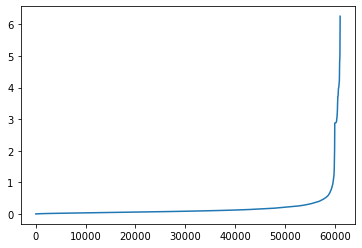

In [53]:
neighbors = NearestNeighbors(n_neighbors=200)
neighbors_fit = neighbors.fit(concat)
distances, indices = neighbors_fit.kneighbors(concat)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

DBSCAN(eps=1.5, min_samples=66)


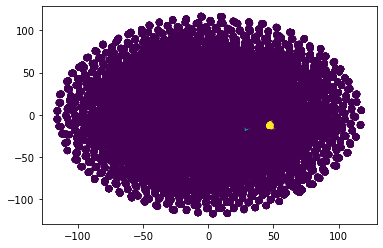

['dbscan_mod.pk1']

In [28]:
# let's also try dbscan
def dbscan_lab(tsne_df):
    dbscan = DBSCAN(eps=1.5, min_samples=66)
    db = dbscan.fit(tsne_df)
    print(db)
    labels = db.labels_
    set(labels)
    return labels
    
def dbscan_viz(tsne_df, dbscan_lab): # visualize dbscan application
    
    labels = dbscan_lab
    plt.scatter(tsne_df['component 1'], tsne_df['component 2'], c=labels)
    
    return plt.show()
    
fin_labels = dbscan_lab(tsne_df)
fin_labels

dbscan_mod = dbscan_viz(tsne_df, fin_labels)

joblib.dump(dbscan_mod, 'dbscan_mod.pk1')


In [29]:
# plt.scatter(tsne_df['component 1'], tsne_df['component 2'], c=labels)
# plt.show()